In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv(r"C:\Users\Mayana\Downloads\ptbdb_clinical_data - ptbdb_clinical_data.csv")
df.head()

,dir_name,patient_number,reg,fs,sig_len,n_sig,age,sex,ECG date,Reason_for_admission,...,Therapy,Infarction_date.1,Admission_date,Medication_pre_admission,Start_lysis_therapy,Lytic_agent,Dosage,Additional_medication,In_hospital_medication,Medication_after_discharge
0,patient001,1,s0010_re,1000,38400,15,81.0,female,01/10/1990,Myocardial infarction,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19h45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
1,patient001,1,s0014lre,1000,115200,15,81.0,female,17/10/1990,Myocardial infarction,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19h45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
2,patient001,1,s0016lre,1000,115200,15,81.0,female,18/10/1990,Myocardial infarction,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19h45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
3,patient002,2,s0015lre,1000,115200,15,58.0,female,17/10/1990,Myocardial infarction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,patient003,3,s0017lre,1000,115200,15,63.0,male,18/10/1990,Myocardial infarction,...,NaN,02-Oct-90,02-Oct-90,-,NaN,Gamma-TPA,30 mg,Furosemide,ASA Isosorbit-Mononitrate,ASA Isosorbit-Mononitrate


In [61]:
print("{} exames de pacientes {} que têm NaN no diagnóstico".format(
    df.loc[df.Reason_for_admission.isnull(), "dir_name"].size,
    df.loc[df.Reason_for_admission.isnull(), "dir_name"].nunique()
))

27 exames de pacientes 22 que têm NaN no diagnóstico


In [62]:
# Remover gravações dos diagnósticos não disponíveis
antes = df.shape[0]
df = df.drop(df[df.Reason_for_admission.isnull()].index)
print("Antes: {}, Depois: {}, {} gravações removidas".format(antes, df.shape[0], antes - df.shape[0]))

Antes: 549, Depois: 522, 27 gravações removidas


In [63]:
df.groupby(["dir_name"])['reg'].nunique().value_counts().sort_index()

1    159
2     24
3     31
4     50
5      3
7      1
Name: reg, dtype: int64

In [64]:
idade = df.groupby(["dir_name"])['age'].apply(lambda x: list(np.unique(x))[0])
print("Idade não especificada para {} pacientes".format(idade.isna().sum()))

Idade não especificada para 8 pacientes


In [65]:
idade.describe()

count    260.000000
mean      56.861538
std       14.444811
min       17.000000
25%       48.000000
50%       58.000000
75%       67.000000
max       87.000000
Name: age, dtype: float64

Text(0.5, 0, 'Idade')

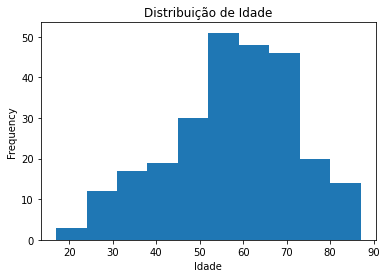

In [66]:
ax = idade.plot.hist(title="Distribuição de Idade")
ax.set_xlabel("Idade")

C:\Users\Mayana\AppData\Local\Temp/ipykernel_25484/1136312251.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_diagnosis = df.groupby(["Reason_for_admission"])['dir_name', 'signal_duration']


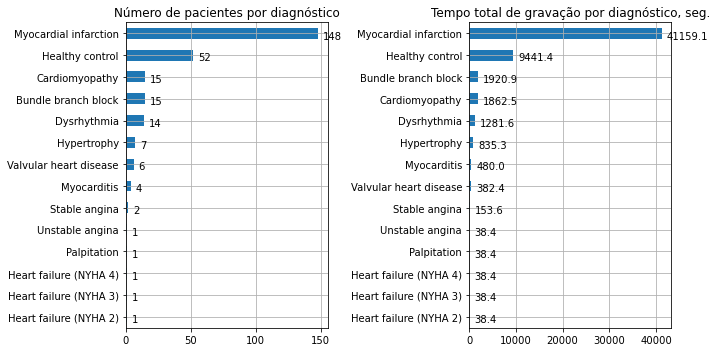

In [67]:
# Pacientes diagnosticados com alguma particularidade:
df["signal_duration"] = df["sig_len"] / df["fs"]

groupby_diagnosis = df.groupby(["Reason_for_admission"])['dir_name', 'signal_duration']
groupby_diagnosis = groupby_diagnosis.agg({"dir_name": 'nunique', "signal_duration": "sum"})

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)

groupby_diagnosis["dir_name"].sort_values(ascending=True).plot(ax=axes[0], kind='barh', grid=True, figsize=(10,5), 
title="Número de pacientes por diagnóstico")

for p in axes[0].patches:
    axes[0].annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 0), textcoords='offset points')

groupby_diagnosis["signal_duration"].sort_values(ascending=True).plot(ax=axes[1], kind='barh', grid=True, figsize=(10,5), 
title="Tempo total de gravação por diagnóstico, seg.")

for p in axes[1].patches:
    val = "{:.1f}".format(p.get_width())
    axes[1].annotate(val, (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 0), textcoords='offset points')
    
fig.tight_layout()


In [68]:
# Infarto Agudo do Miocárdio
df["myocardial_infarction"] = (df.Reason_for_admission == "Myocardial infarction").astype(int)

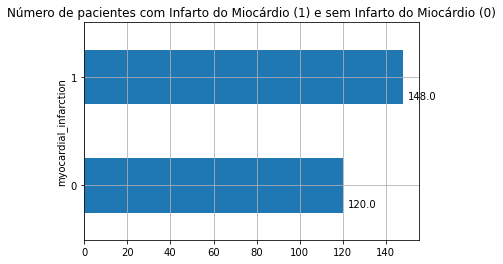

In [69]:
_t = df.groupby(["myocardial_infarction"])["dir_name"].nunique()
ax = _t.sort_values(ascending=True).plot(kind='barh', grid=True, 
title="Número de pacientes com Infarto do Miocárdio (1) e sem Infarto do Miocárdio (0)")
# ax.set_yticklabels(["MI", "Non-MI"], rotation=0)
for p in ax.patches:
    val = "{:.1f}".format(p.get_width())
    ax.annotate(val, (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

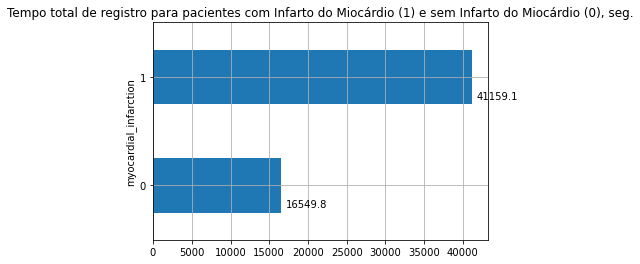

In [70]:
_t = df.groupby(["myocardial_infarction"])["signal_duration"].sum()
ax = _t.sort_values(ascending=True).plot(kind='barh', grid=True, 
title="Tempo total de registro para pacientes com Infarto do Miocárdio (1) e sem Infarto do Miocárdio (0), seg.")

for p in ax.patches:
    val = "{:.1f}".format(p.get_width())
    ax.annotate(val, (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

Text(0.5, 1.05, 'Distribuição de Idade por pacientes sem Infarto do Miocárdio (0) e com Infarto do Miocárdio (1)')

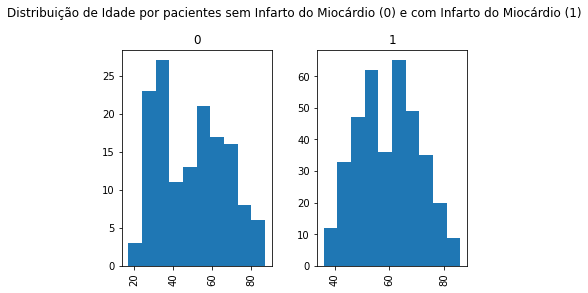

In [71]:
df['age'].hist(by=df['myocardial_infarction'], stacked=True)
plt.suptitle('Distribuição de Idade por pacientes sem Infarto do Miocárdio (0) e com Infarto do Miocárdio (1)', y=1.05)

Text(0.5, 1.05, 'Distribuição de gênero por pacientes sem Infarto do Miocárdio (0) e com Infarto do Miocárdio (1)')

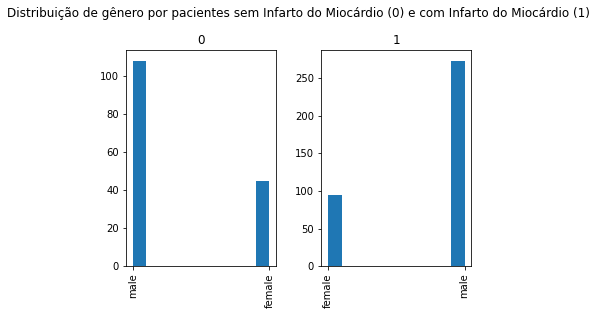

In [72]:
df['sex'].hist(by=df['myocardial_infarction'], stacked=True)
plt.suptitle('Distribuição de gênero por pacientes sem Infarto do Miocárdio (0) e com Infarto do Miocárdio (1)', y=1.05)

In [74]:
# Cardiomiopatia

df["Cardiomyopathy"] = (df.Reason_for_admission == "Cardiomyopathy").astype(int)


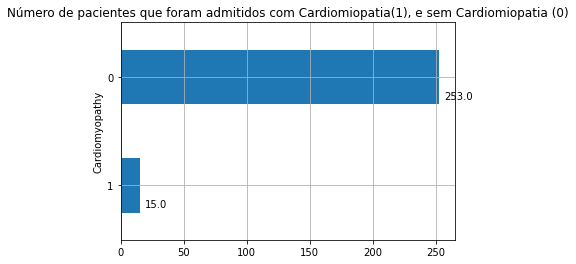

In [75]:
_t = df.groupby(["Cardiomyopathy"])["dir_name"].nunique()
ax = _t.sort_values(ascending=True).plot(kind='barh', grid=True, 
title="Número de pacientes que foram admitidos com Cardiomiopatia(1), e sem Cardiomiopatia (0)")
# ax.set_yticklabels(["MI", "Non-MI"], rotation=0)
for p in ax.patches:
    val = "{:.1f}".format(p.get_width())
    ax.annotate(val, (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

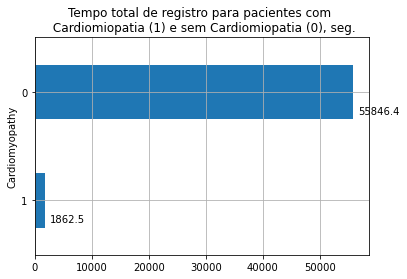

In [76]:
_t = df.groupby(["Cardiomyopathy"])["signal_duration"].sum()
ax = _t.sort_values(ascending=True).plot(kind='barh', grid=True, 
                                      title="Tempo total de registro para pacientes com \n Cardiomiopatia (1) e sem Cardiomiopatia (0), seg.")
# ax.set_yticklabels(["MI", "Non-MI"], rotation=0)
for p in ax.patches:
    val = "{:.1f}".format(p.get_width())
    ax.annotate(val, (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

In [77]:
df.head()

,dir_name,patient_number,reg,fs,sig_len,n_sig,age,sex,ECG date,Reason_for_admission,...,Medication_pre_admission,Start_lysis_therapy,Lytic_agent,Dosage,Additional_medication,In_hospital_medication,Medication_after_discharge,signal_duration,myocardial_infarction,Cardiomyopathy
0,patient001,1,s0010_re,1000,38400,15,81.0,female,01/10/1990,Myocardial infarction,...,Isosorbit-Dinitrate Digoxin Glibenclamide,19h45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...,38.4,1,0
1,patient001,1,s0014lre,1000,115200,15,81.0,female,17/10/1990,Myocardial infarction,...,Isosorbit-Dinitrate Digoxin Glibenclamide,19h45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...,115.2,1,0
2,patient001,1,s0016lre,1000,115200,15,81.0,female,18/10/1990,Myocardial infarction,...,Isosorbit-Dinitrate Digoxin Glibenclamide,19h45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...,115.2,1,0
3,patient002,2,s0015lre,1000,115200,15,58.0,female,17/10/1990,Myocardial infarction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.2,1,0
4,patient003,3,s0017lre,1000,115200,15,63.0,male,18/10/1990,Myocardial infarction,...,-,NaN,Gamma-TPA,30 mg,Furosemide,ASA Isosorbit-Mononitrate,ASA Isosorbit-Mononitrate,115.2,1,0
